In [1]:
import matplotlib.image as img
from fastai import *
from fastai.vision import *

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,8)

In [3]:
path = 'data/'
os.listdir(path)

['sample_submission.csv', 'test', 'valid', 'models', 'train']

In [4]:
cats = os.listdir(f'{path}/train/cat')
dogs = os.listdir(f'{path}/train/dog')
cats[:3]

['cat.2648.jpg', 'cat.6224.jpg', 'cat.11264.jpg']

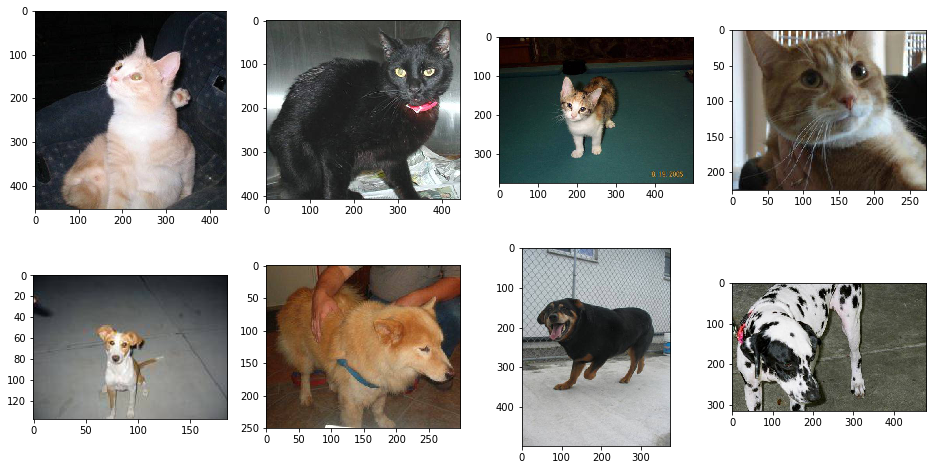

In [5]:
fig, ax = plt.subplots(2,4)

for i in range(4):
    ax[0][i].imshow(img.imread(f'{path}train/cat/{cats[i]}'))
    ax[1][i].imshow(img.imread(f'{path}train/dog/{dogs[i]}'))

#It's allready done, ignore it!
#move files to 'valid' folders
for group in ['cat']:
    group_path = f'{path}train/{group}/'
    group_files = os.listdir(group_path)
    group_len = len(group_files)
    to_move = random.sample(range(group_len), int(group_len/5))
    
for idx in to_move:
    file_name = group_files[idx]
    shutil.move(f'{group_path}{file_name}', f'{path}valid/{group}/{file_name}')

In [6]:
my_model = models.resnet101
my_size = 64
my_tfms = get_transforms()
data = ImageDataBunch.from_folder(path, ds_tfms=my_tfms, size=my_size, test='test').normalize(imagenet_stats)

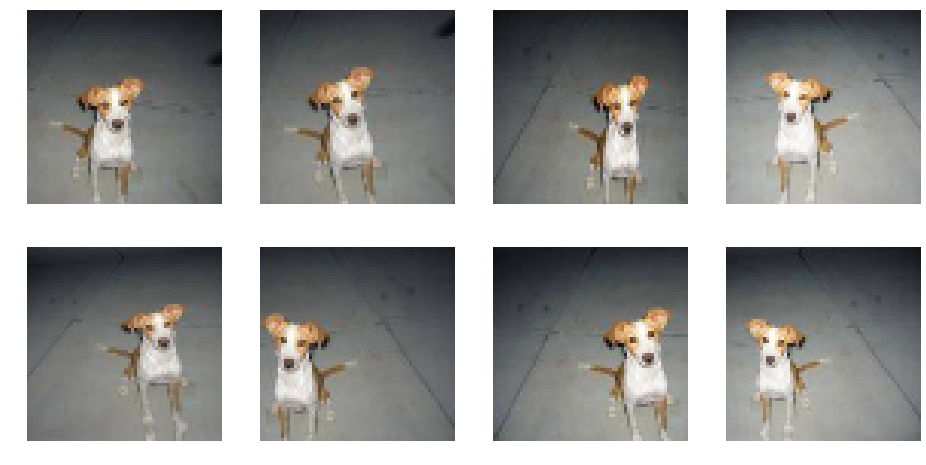

In [7]:
def get_ex(): return open_image(f'{path}/train/dog/{dogs[0]}')

def plots_f(rows, cols, width, height, **kwargs):
    [apply_tfms(my_tfms[0], get_ex(), **kwargs).show(ax=ax) for i,ax in enumerate(plt.subplots(
        rows,cols,figsize=(width,height))[1].flatten())]

plots_f(2, 4, 16, 8, size=my_size)

In [8]:
print('Train cats:', sum(data.train_ds.ds.y == 0))
print('Train dogs:', sum(data.train_ds.ds.y == 1))
print('Valid cats: ', sum(data.valid_ds.ds.y == 0))
print('Valid dogs: ', sum(data.valid_ds.ds.y == 1))
print('Test pics: ', len(data.test_ds))

Train cats: 10000
Train dogs: 10000
Valid cats:  2500
Valid dogs:  2500
Test pics:  12500


In [9]:
learn = create_cnn(data, my_model, metrics=accuracy)

In [10]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


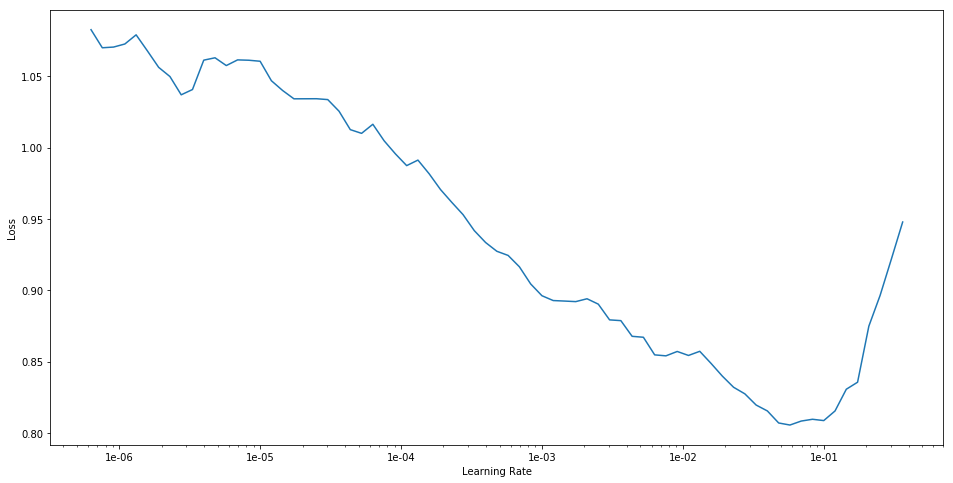

In [11]:
learn.recorder.plot()

In [12]:
learn.fit(2)

Total time: 01:36
epoch  train_loss  valid_loss  accuracy
1      0.267248    0.221060    0.906800  (00:49)
2      0.211152    0.209350    0.928400  (00:47)



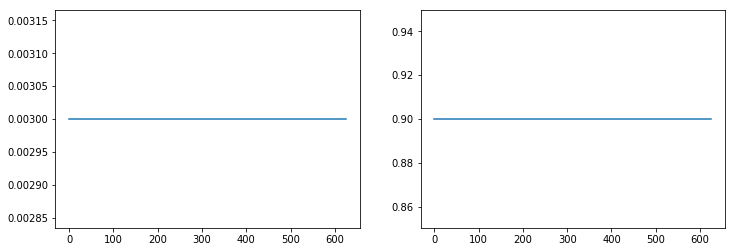

In [13]:
learn.recorder.plot_lr(show_moms=True)

In [14]:
learn.unfreeze()
learn.fit(2)

Total time: 01:56
epoch  train_loss  valid_loss  accuracy
1      0.313702    0.275427    0.884200  (00:59)
2      0.276319    0.258805    0.889600  (00:57)



In [15]:
probs = learn.get_preds(ds_type=DatasetType.Test)

In [16]:
result = pd.DataFrame(to_np(probs[0]), columns=data.classes)

result.index = data.test_ds.ds.x.astype(str)
result.index = result.index.str.strip('data/test/')
result.index = result.index.str.strip('.jpg')
result.index = result.index.map(int)
result.index.name = 'id'

result = result.drop(columns='cat')
result = result.rename(columns = {'dog':'label'})
result.sort_index(inplace=True)

result[:6]

,label
id,
1,0.950848
2,1.000000
3,1.000000
4,0.998786
5,0.132204
6,0.025243


In [19]:
result.to_csv('~/DogsVsCats/data/submission_01.csv')
!head -7 ~/DogsVsCats/data/submission_01.csv

id,label
1,0.9508476
2,1.0
3,1.0
4,0.9987857
5,0.13220444
6,0.0252429


data/test/1.jpg
data/test/2.jpg
data/test/3.jpg
data/test/4.jpg
data/test/5.jpg
data/test/6.jpg


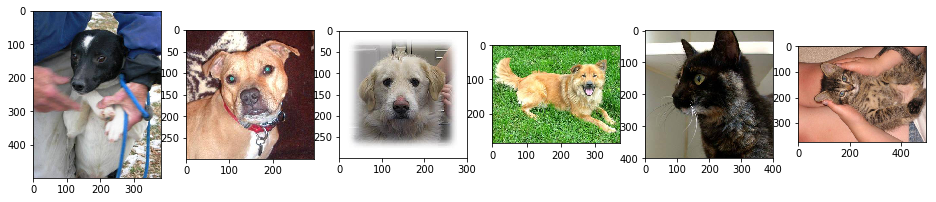

In [20]:
fig, ax = plt.subplots(1,6)

for i in range(6):
    fname = f'{path}test/{i+1}.jpg'
    print(fname)
    ax[i].imshow(img.imread(fname))

(model, batch size)(learning rate, number of cycles) - train loss, validation loss, accuracy
(resnet18,  64)(0.01, 2) - 0.317192   0.275304   0.8766  
(resnet34,  64)(0.01, 2) - 0.290045   0.259357   0.8862  
(resnet50,  64)(0.01, 2) - 0.217489   0.198424   0.9094 <-- default
(resnet101, 64)(0.01, 2) - 0.225131   0.197778   0.9200   
(resnet152, 64)(0.01, 2) - 0.220984   0.198254   0.9142  
(vgg16,     64)(0.01, 2) - 0.217524   0.17935    0.9260  
(vgg19,     64)(0.01, 2) - 0.218113   0.182801   0.9228  

different resnet50:
(resnet50,  32)(0.01, 2) - 0.47635    0.452985   0.7850  
(resnet50,  64)(0.001,2) - 0.235529   0.202365   0.9108  
(resnet50,  64)(0.01, 2) - 0.217489   0.198424   0.9094 <-- default
(resnet50,  64)(0.01, 2) - 0.209568   0.194419   0.9166 aug_tfms=transforms_side_on, max_zoom=1.1 
(resnet50,  64)(0.1,  2) - 0.236555   0.197519   0.9182   
(resnet50, 128)(0.01, 2) - 0.065976   0.043656   0.9856 
(resnet50, 256)(0.01, 2) - 0.029497   0.022395   0.9926 